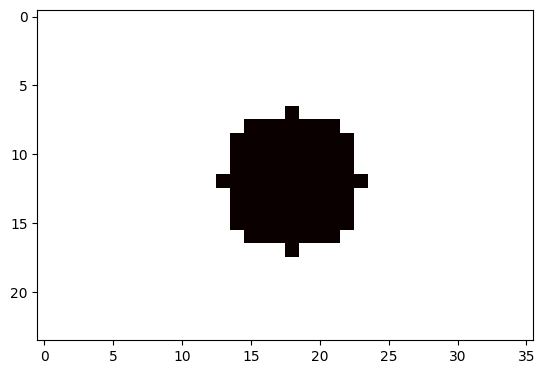

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import itertools as itr
import copy
from boundaries import WallBoundary, PressureBoundary, VelocityBoundary
from generators import WallGenerators
from simulation import Simulation
import random

# np.seterr(divide=None, invalid=None)  # For suppressing warnings. Totally optional.

yResolution = 24
xResolution = 36
initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
walls = WallBoundary(yResolution, xResolution)
# walls.borderWall()
walls.cylindricalWall([12, 18], 5)
velocityInlet = [] # [VelocityBoundary(12, 2, 1, 1)]
pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

simulation = Simulation(
    yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
)

plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

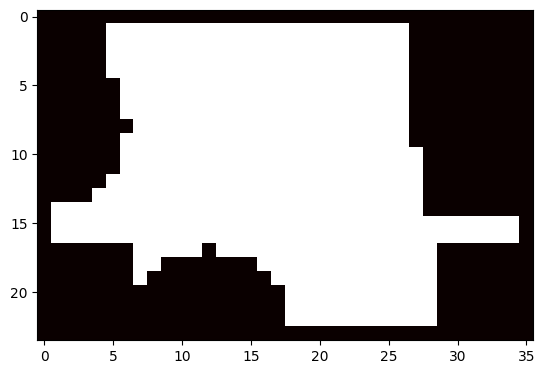

In [155]:
yResolution = 24
xResolution = 36
initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
walls = WallBoundary(yResolution, xResolution)
# walls.borderWall()

for i in random.sample(range(8), k = random.randint(1,8)):
    
    possiblePositions = [(int(yResolution/3), xResolution - 1), (0, int(xResolution/3)), (int(yResolution/3), 0), (yResolution - 1, int(xResolution/3)), (0, xResolution - 1), (0, 0), (yResolution - 1, 0), (yResolution - 1, xResolution - 1)]

    wallPos = possiblePositions[i]
    maxSize = int(min(yResolution, xResolution) * 0.4)
    minSize = int(min(yResolution, xResolution) * 0.2)
    if random.random() < 0.5:
        walls.cylindricalWall(wallPos, random.randint(minSize, maxSize))
    else:
        directions = [(1,-1),(1,1),(1,1),(-1,1),(1,-1),(1,1),(-1,1),(-1,-1)]
        endPos = (wallPos[0] + (random.randint(minSize, maxSize)*directions[i][0]), wallPos[1] + (random.randint(minSize, maxSize)*directions[i][1]))
        walls.filledStraightRectangularWall(wallPos, endPos)
    #print(f"{i} {wallPos} {endPos} {directions[i]}")

walls.borderWall()

velocityInlet = [VelocityBoundary(12, 2, 1, 1)]
#pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

simulation = Simulation(
    yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
)

plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

{'NumberOfCuts': 4, 'TypesOfCuts': [0, 1, 1, 0], 'CutPositionsX': [0, 10, 10, 31], 'CutPositionsY': [16, 47, 0, 0], 'CutSizesX': [7, 8, 11, 7], 'CutSizesY': [7, 12, 7, 7]}


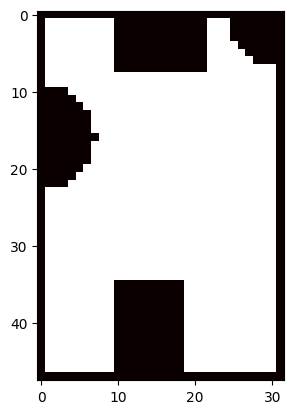

In [156]:
yResolution = 48
xResolution = 32
initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
walls = WallBoundary(yResolution, xResolution)
# walls.borderWall()
walls.borderWall()
conditions = walls.generateRoom()
walls.generateIndex()
walls.generateACPosandDirections()
print(conditions)
#velocityInlet = [VelocityBoundary(12, 2, 1, 1)]
#pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

simulation = Simulation(
    yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
)

plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

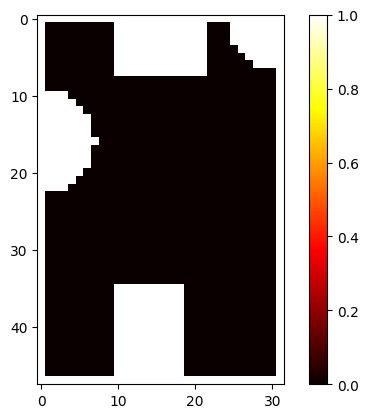

In [157]:
fig, ax = plt.subplots()
heatmap  = ax.imshow(walls.boundary, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)

In [158]:
walls.generateACPosandDirections()

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 22), (0, 23), (0, 24), (1, 0), (1, 10), (1, 21), (1, 25), (2, 0), (2, 10), (2, 21), (2, 25), (3, 0), (3, 10), (3, 21), (3, 25), (4, 0), (4, 10), (4, 21), (4, 26), (5, 0), (5, 10), (5, 21), (5, 27), (6, 0), (6, 10), (6, 21), (6, 28), (6, 29), (6, 30), (7, 0), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (7, 21), (7, 31), (8, 0), (8, 31), (9, 0), (9, 31), (10, 1), (10, 2), (10, 3), (10, 31), (11, 4), (11, 31), (12, 5), (12, 31), (13, 6), (13, 31), (14, 6), (14, 31), (15, 6), (15, 31), (16, 6), (16, 7), (16, 31), (17, 6), (17, 31), (18, 6), (18, 31), (19, 6), (19, 31), (20, 5), (20, 31), (21, 4), (21, 31), (22, 1), (22, 2), (22, 3), (22, 31), (23, 0), (23, 31), (24, 0), (24, 31), (25, 0), (25, 31), (26, 0), (26, 31), (27, 0), (27, 31), (28, 0), (28, 31), (29, 0), (29, 31), (30, 0), (30, 31), (31, 0), (31, 31), (32, 0), (32, 31), (33, 0), (33, 31), (34, 0), (34

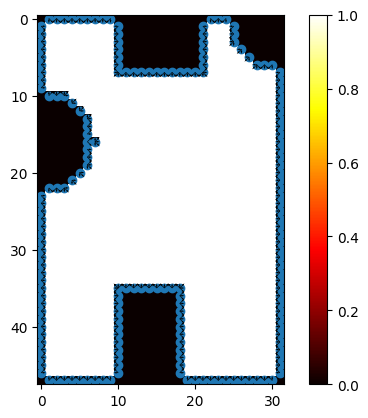

In [159]:
#walls.possibleACPos
fig, ax = plt.subplots()
heatmap  = ax.imshow(walls.invertedBoundary, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)
ax.scatter([i[1] for i in walls.possibleACPos], [i[0] for i in walls.possibleACPos])
print(walls.possibleACPos)
print(walls.possibleACDirections)

outPutDirectionsY = np.array([WallBoundary.unitVect[j][0] for i in walls.possibleACDirections for j in i])
outPutDirectionsX = np.array([WallBoundary.unitVect[j][1] for i in walls.possibleACDirections for j in i])
outPutPositionsX = [i[0] for index, i in enumerate(walls.possibleACPos) for j in range(len(walls.possibleACDirections[index]))]
print(len(outPutPositionsX))
outPutPositionsY = [i[1] for index, i in enumerate(walls.possibleACPos) for j in range(len(walls.possibleACDirections[index]))]
quivermap = ax.quiver(outPutPositionsY, outPutPositionsX, 310*outPutDirectionsX, -310*outPutDirectionsY)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 22), (0, 23), (0, 24), (1, 0), (1, 10), (1, 21), (1, 25), (2, 0), (2, 10), (2, 21), (2, 25), (3, 0), (3, 10), (3, 21), (3, 25), (4, 0), (4, 10), (4, 21), (4, 26), (5, 0), (5, 10), (5, 21), (5, 27), (6, 0), (6, 10), (6, 21), (6, 28), (6, 29), (6, 30), (7, 0), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (7, 21), (7, 31), (8, 0), (8, 31), (9, 0), (9, 31), (10, 1), (10, 2), (10, 3), (10, 31), (11, 4), (11, 31), (12, 5), (12, 31), (13, 6), (13, 31), (14, 6), (14, 31), (15, 6), (15, 31), (16, 6), (16, 7), (16, 31), (17, 6), (17, 31), (18, 6), (18, 31), (19, 6), (19, 31), (20, 5), (20, 31), (21, 4), (21, 31), (22, 1), (22, 2), (22, 3), (22, 31), (23, 0), (23, 31), (24, 0), (24, 31), (25, 0), (25, 31), (26, 0), (26, 31), (27, 0), (27, 31), (28, 0), (28, 31), (29, 0), (29, 31), (30, 0), (30, 31), (31, 0), (31, 31), (32, 0), (32, 31), (33, 0), (33, 31), (34, 0), (34

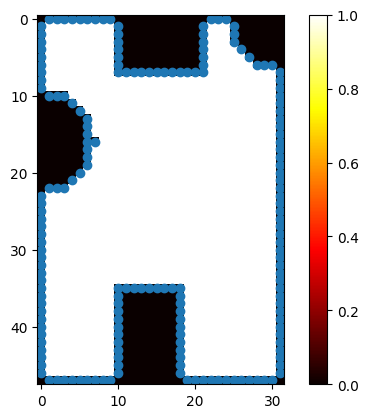

In [160]:
walls.boundaryIndex
walls.boundary
from scipy.ndimage import convolve
def numerical_inverse(n):
    return int(n != 1)

applyall = np.vectorize(numerical_inverse)
inverted = applyall(walls.boundary.astype(int))
#print(inverted)
#plt.imshow(inverted, cmap="hot", interpolation="nearest")
padded_array = np.pad(inverted, pad_width=1, mode='constant', constant_values=0)
kernel = [[1,1,1],[1,0,1],[1,1,1]]
edgeMinesweeper = convolve(padded_array, kernel)[1:-1, 1:-1] 
edgesProcessed = np.logical_and(edgeMinesweeper >= 2, edgeMinesweeper <= 5)

edges = []
edgesX = []
edgesY = []
for i in walls.boundaryIndex:
    if (edgesProcessed[i[0], i[1]]):
        edges.append((i[0], i[1]))
        edgesX.append(i[0])
        edgesY.append(i[1])

print(edges)
fig, ax = plt.subplots()
heatmap  = ax.imshow(inverted, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)
ax.scatter(edgesY, edgesX)

In [161]:
from scipy.ndimage import convolve

def numerical_inverse(n):
    return int(n != 1)

data = np.array([[1,1,1,1],[1,0,0,1],[1,0,0,1],[1,1,1,1]])

applyall = np.vectorize(numerical_inverse)
inverted = applyall(data)
print(inverted)

padded_array = np.pad(inverted, pad_width=1, mode='constant', constant_values=0)
kernel = [[1,1,1],[1,0,1],[1,1,1]]



print(convolve(padded_array, kernel)[1:-1, 1:-1])

[[0 0 0 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 0 0 0]]
[[1 2 2 1]
 [2 3 3 2]
 [2 3 3 2]
 [1 2 2 1]]


In [162]:
simulation.simulate(step = 10)
print(simulation.isAtDensityEquilibirum(1.9))

densityPlot = copy.copy(simulation.density)
densityPlot[walls.invertedBoundary] -= np.min(densityPlot[walls.invertedBoundary])

fig, ax = plt.subplots()
heatmap = ax.imshow(densityPlot, cmap = "rainbow", interpolation = "nearest")
quivermap = ax.quiver(simulation.xIndex, simulation.yIndex, simulation.momentumX, -simulation.momentumY)
fig.colorbar(heatmap)
# print(simulation.fluid)
plt.show()

IndexError: index 32 is out of bounds for axis 1 with size 32